In [2]:
import numpy as np
from matplotlib import pyplot as plt, cm, colors
from time import sleep 
from IPython.display import clear_output


In [3]:
# Parameters

# number of timesteps to simulate
tn = 1000

# Resolution of grid in x respectively y direction
xn = 15
yn = 10

# velocity set c 
# ordered as upper left, upper middle, upper right, mid left, center, ... 
c = np.array([[-1, 0, 1, -1, 0, 1, -1, 0, 1], [1, 1, 1, 0, 0, 0, -1, -1, -1]]).transpose()

# we use 9 different direction vectors
ln = 9
idxs = np.arange(ln)

# weights in same order as c for calculation of collisions 
weights = [1/36, 1/9, 1/36, 1/9, 4/9, 1/9, 1/36, 1/9, 1/36]
assert(np.sum(weights) == 1)


In [4]:
# Initialization of F 

# F is used as a matrix to store velocities
# This F is used to calculate the densities and velocities
# Thus it has shape of xn,yn,9
F = np.zeros((xn,yn,ln))
# initialization of F, for instance by setting only one coordinate to a specific value or all to random values
#F[1,1,5] = 1000

F = np.ones((xn,yn,ln))
F[4,4,0] = 100 
#F += 0.01*np.random.randn(xn,yn,ln)
# avgDensity = 100
# F *= avgDensity

In [5]:
# calculates density at point x,y 
def density(x,y):
    return np.sum(F[x,y])

# calculates the density for each lattice point
def densityGrid():
    XY = np.ones((xn,yn))
    for x in range(xn):
        for y in range(yn):
            XY[x][y] = density(x,y)
    return XY 


# calculates the velocity for one lattice point 
def velocity(x,y):
    val = 0
    for i in range(ln):
        val += F[x,y,i] * c[i] 
    return (1/density(x,y)) * val

def velocityGrid():
    U = np.ones((xn,yn))
    V = np.ones((xn,yn))
    for x in range(xn):
        for y in range(yn):
            uv = velocity(x,y)
            U[x][y] = uv[0]
            V[x][y] = uv[1]
    return (U,V) 

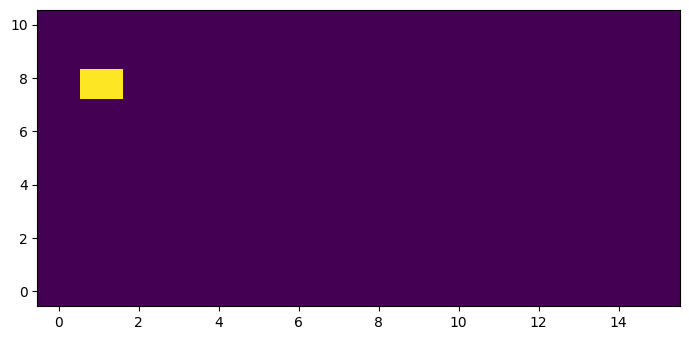

In [26]:

def visDensity(update=False, data=[]):
    fig, ax = plt.subplots()

    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True

    xaxis = np.linspace(0, xn, xn)
    yaxis = np.linspace(0, yn, yn)

    X, Y = np.meshgrid(xaxis, yaxis)
    Z = densityGrid().transpose() 
    
    meshData = ax.pcolormesh(X, Y, Z, shading='auto')
    #meshData.update({'array':np.ones((10,15))})
    plt.show()
    return meshData

visDensity()

def visVelocity():

    xaxis = np.linspace(0, xn, xn)
    yaxis = np.linspace(0, yn, yn)
    X, Y = np.meshgrid(xaxis, yaxis)
    
    u,v = velocityGrid()

    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    # Plotting stream plot
    plt.streamplot(X, Y, u.transpose(), v.transpose(), density = 0.5)
    
    # show plot
    plt.show()


In [16]:
# streaming function, simulates momentum of the particles for one unit timestep 

def streaming():
    for i in idxs:
        cx = c[i][0]
        cy = c[i][1]
        F[:,:,i] = np.roll(F[:,:,i], cx, axis=0)
        F[:,:,i] = np.roll(F[:,:,i], cy, axis=1)

def collision():
    pass


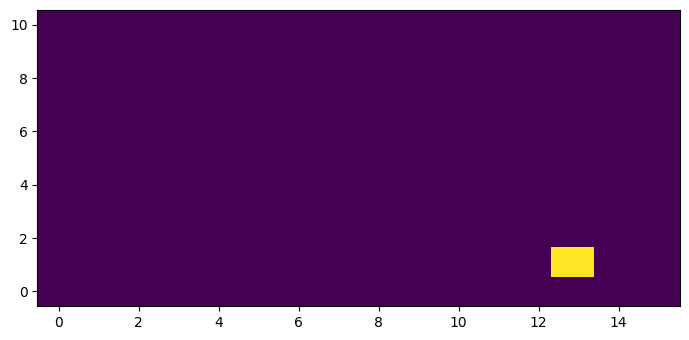

<Figure size 700x350 with 0 Axes>

In [29]:
# simulation

meshData = visDensity()
meshData.update({'array':np.ones((10,15))})
plt.draw()
plt.show()
for t in range(5):
    streaming()
    collision()
    sleep(3)
    
